In [14]:
from pystac_client import Client
from odc.stac import load
import xarray as xr
import numpy as np
import odc.geo # noqa
from xarray import DataArray, Dataset
from odc.geo.geom import Geometry
from odc.geo.xr import mask

In [15]:
site = "nukuira"

In [16]:
# client = Client.open("https://stac.digitalearthpacific.org")

catalog = "https://stac.digitalearthpacific.org"
collection = "dep_s2_ammi"

In [17]:
# Coordinates grabbed from Google Maps

# Raviravi, VL, Fiji
ll = (-16.544442,178.759840)
ur = (-16.485047,178.827006)

bbox = (ll[1], ll[0], ur[1], ur[0])

# Find STAC items
client = Client.open(catalog)
items = client.search(collections=[collection], bbox=bbox).items()
items = [i for i in items]

print(f"Found {len(items)} items")

Found 8 items


In [18]:
config = {
    collection: {
        "assets": {
            "mangroves": {"data_type": "int16"}
        }
    }
}

data = load(items, bbox=bbox, bands=["mangroves"], stac_cfg=config)
data

<xarray.Dataset> Size: 8MB
Dimensions:      (y: 686, x: 748, time: 8)
Coordinates:
  * y            (y) float64 5kB -1.849e+06 -1.849e+06 ... -1.856e+06 -1.856e+06
  * x            (x) float64 6kB 3.202e+06 3.202e+06 ... 3.209e+06 3.209e+06
    spatial_ref  int32 4B 3832
  * time         (time) datetime64[ns] 64B 2017-01-01 2018-01-01 ... 2024-01-01
Data variables:
    mangroves    (time, y, x) int16 8MB 255 255 255 255 255 ... 255 255 255 255

(array([1.248610e+05, 1.041950e+05, 8.190600e+04, 6.402000e+04,
        5.066300e+04, 0.000000e+00, 3.924500e+04, 3.014100e+04,
        2.238000e+04, 1.662900e+04, 0.000000e+00, 1.203700e+04,
        8.702000e+03, 6.160000e+03, 4.436000e+03, 3.261000e+03,
        0.000000e+00, 2.460000e+03, 1.347300e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 3.520455e+06]),
 array([ 10. ,  14.9,  19.8,  24.7,  29.6,  34.5,  39.4,  44.3,  49.2,
         54.1,  59. ,  63.9,  68.8,  73.7,  78.6,  83.5,  88.4,  93.3,
         98.2, 103.1, 108. , 112.9, 117.8, 122.7, 12

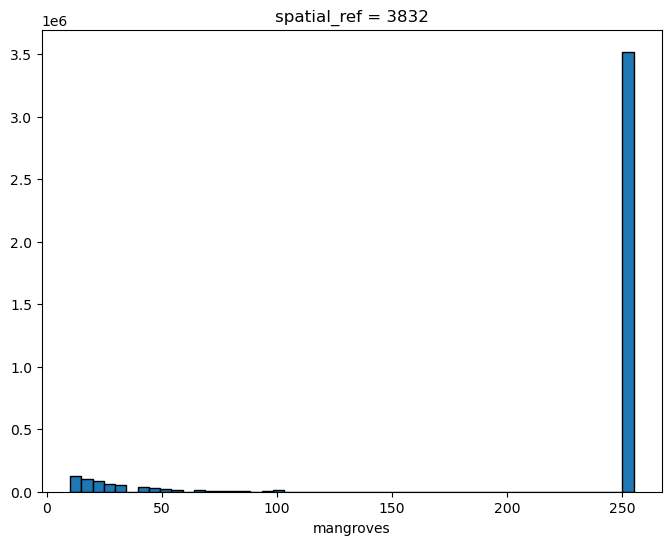

In [36]:
# CORRECT WAY: Assign the existing DataArray object to the new variable.
data_array = data.mangroves

# The rest of your plotting code should now work:
data_array.plot.hist(
    bins=50,
    edgecolor='black',
    # title='Histogram of DataArray Values',
    figsize=(8, 6)
)

In [30]:
data.mangroves

<xarray.DataArray 'mangroves' (time: 8, y: 686, x: 748)> Size: 8MB
array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
...
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=int16)
Coordinates:
  * y            (y) float64 5kB -1.849e+06 -1.849e+06 ... -1.856e+06 -1.856e+06
  * x            (x) float64 6kB 3.202e+06 3.202e+06 ... 3.209e+06 3.209e+06
    spatial_ref  int32 4B 3832
  * time         (time) datetime64[ns] 64B 2017-01-01 2018-01-01 ... 2024-01-01

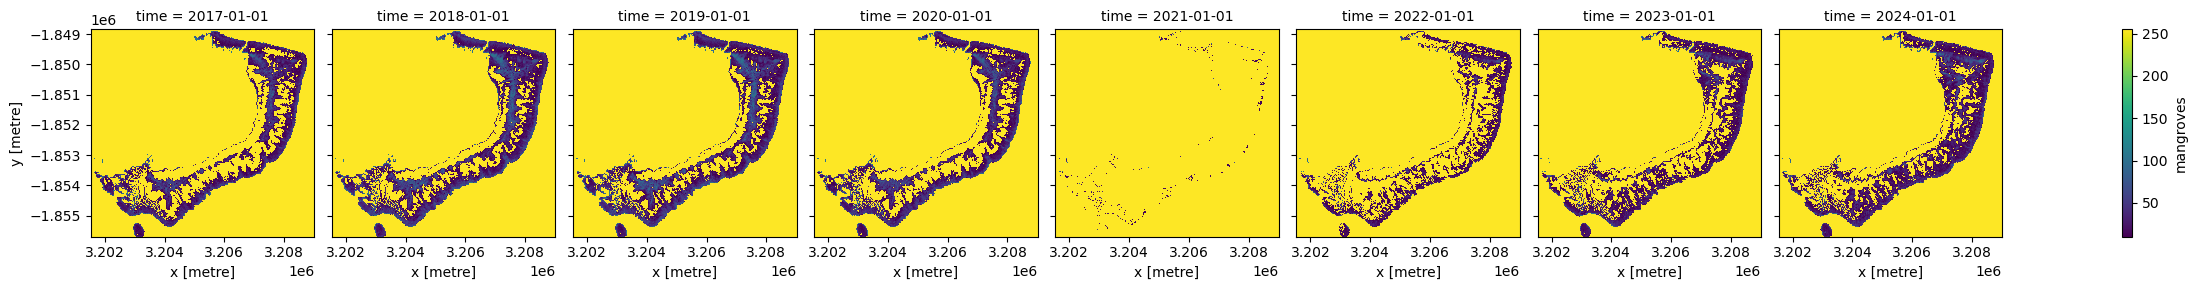

In [26]:
data.mangroves.plot(col='time')

In [29]:
import numpy as np
# Assuming my_raster is your xarray.DataArray

# 1. Define the old and new No Data values
OLD_NODATA = -255
NEW_NODATA = 0

# 2. Use the xarray.DataArray.where() method to replace the value.
#    The `where` method keeps the values where the condition is True,
#    and replaces values where the condition is False with the specified value.

data = data.where(
    data != OLD_NODATA, # Keep all values that are NOT -1020
    NEW_NODATA               # Replace -1020 with -9
)

# 3. (Optional but recommended) Update the attributes if available
#    This ensures future tools/functions recognize the new No Data value.
if 'nodata' in data.attrs:
    data.attrs['nodata'] = NEW_NODATA
elif '_FillValue' in data.attrs:
    data.attrs['_FillValue'] = NEW_NODATA

print(f"No Data value -255 has been changed to {NEW_NODATA}")

No Data value -255 has been changed to 0


In [24]:
# data.odc.write_cog("test_nukuira.tiff")

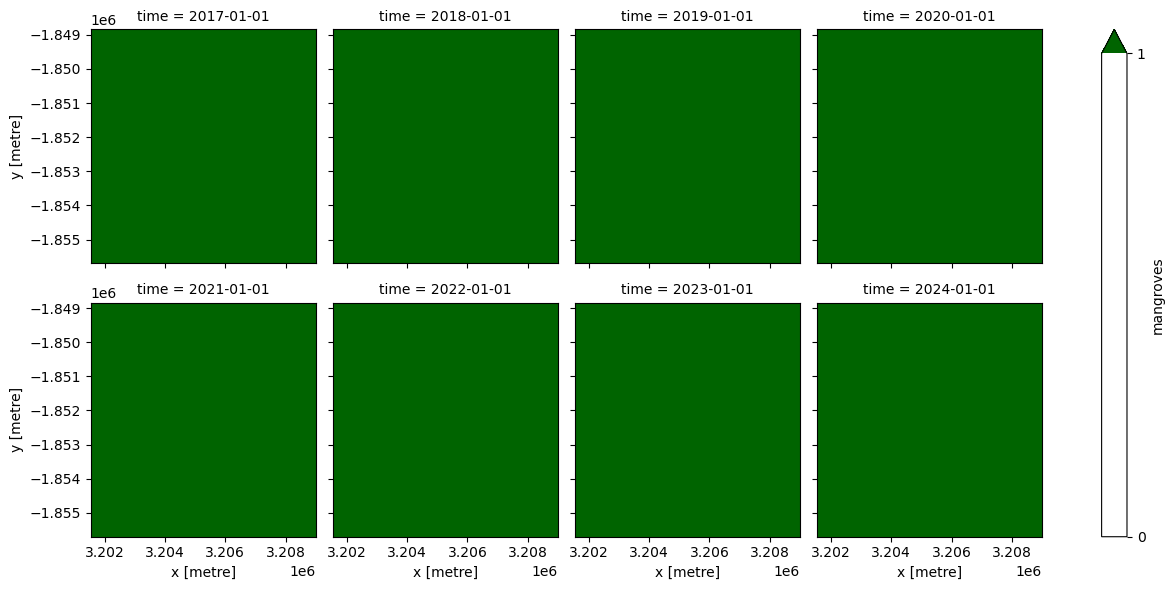

In [25]:
data.mangroves.plot.imshow(
    col="time",
    col_wrap=4,
    levels=[0, 1],
    colors=["white", "darkgreen"],
)

In [67]:
# Define the values you want to count (0, 1, and 2)
values_to_count = [0, 1, 2]

# Initialize an empty DataArray to store the counts
count_array = xr.DataArray(
    np.zeros((len(data["time"]), len(values_to_count))),
    coords={"time": data["time"], "values": values_to_count},
    dims=["time", "values"],
)

# Loop through each value and count occurrences in each year
for time in data.time:
    year = time.values.astype("datetime64[Y]")
    one_year_data = data.sel(time=time)
    count = one_year_data.mangroves.groupby(one_year_data.mangroves).count()
    for i, v in enumerate(values_to_count):
        if v not in count.mangroves:
            # Add the missing count to the array
            count_array.loc[{"time": time, "values": v}] = 0
        else:
            # Add the count to the array
            val = count.sel(mangroves=v)
            count_array.loc[{"time": time, "values": v}] = val * 10 / 10000

# Rename the count variable
count_array = count_array.rename("count")
count_array

<xarray.DataArray 'count' (time: 8, values: 3)> Size: 192B
array([[  4.167,  17.715, 106.429],
       [  3.961,   7.867, 116.483],
       [  3.837,   7.288, 117.186],
       [  3.906,  11.405, 113.   ],
       [  7.21 ,  71.237,  49.864],
       [  5.433,  13.312, 109.566],
       [  4.997,  13.328, 109.986],
       [  4.656,   9.788, 113.867]])
Coordinates:
  * time     (time) datetime64[ns] 64B 2017-01-01 2018-01-01 ... 2024-01-01
  * values   (values) int64 24B 0 1 2

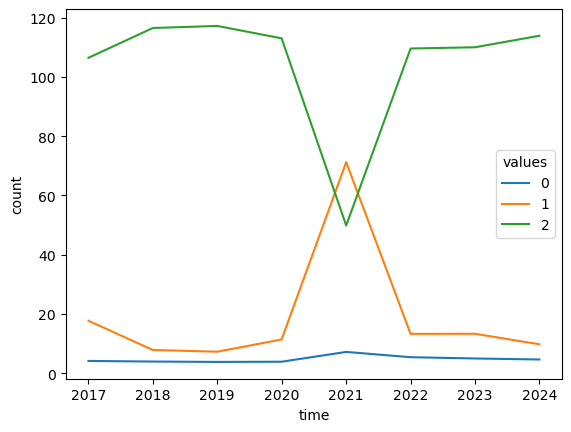

In [68]:
count_array.plot.line(x="time", hue="values")

In [69]:
count_ha = 0.1

dataframe['ha'] = dataframe['count'] * count_ha
dataframe

count       ha
time       values                  
2017-01-01 0         4.167   0.4167
           1        17.715   1.7715
           2       106.429  10.6429
2018-01-01 0         3.961   0.3961
           1         7.867   0.7867
           2       116.483  11.6483
2019-01-01 0         3.837   0.3837
           1         7.288   0.7288
           2       117.186  11.7186
2020-01-01 0         3.906   0.3906
           1        11.405   1.1405
           2       113.000  11.3000
2021-01-01 0         7.210   0.7210
           1        71.237   7.1237
           2        49.864   4.9864
2022-01-01 0         5.433   0.5433
           1        13.312   1.3312
           2       109.566  10.9566
2023-01-01 0         4.997   0.4997
           1        13.328   1.3328
           2       109.986  10.9986
2024-01-01 0         4.656   0.4656
           1         9.788   0.9788
           2       113.867  11.3867

In [70]:
dataframe = count_array.to_dataframe()
results_df = dataframe['count'].unstack(level='time')
x = 4
results_df.columns = results_df.columns.astype(str).str[:x]

In [71]:
class_mapping = {
    0: 'No mangroves',
    1: 'Low canopy cover',
    2: 'High canopy cover'
}

results_df = results_df.rename(index=class_mapping, level='values')

In [76]:
results_df = results_df.rename_axis(columns="Hectares over time")
results_df.index.name = None
results_df

Hectares over time,2017,2018,2019,2020,2021,2022,2023,2024
No mangroves,4.167,3.961,3.837,3.906,7.210,5.433,4.997,4.656
Low canopy cover,17.715,7.867,7.288,11.405,71.237,13.312,13.328,9.788
High canopy cover,106.429,116.483,117.186,113.000,49.864,109.566,109.986,113.867


In [73]:
results_df.to_csv("area_change_detection/"f"{site}-area-cd.csv")

In [74]:
# for year in range(2018, 2023):
#     data.sel(time=str(year), method='nearest').mangroves.odc.write_cog(f"test_change_detection/mangroves_{year}.tif", overwrite=True)

In [ ]:
# data.to_zarr("test.zarr")

In [10]:
for time in data.time:
    year = time.values.astype("datetime64[Y]")
    one_year_data = data.sel(time=time)
    # one_year_data.mangroves.odc.write_cog(f"mangroves_{year}.tif")

In [45]:
import numpy as np
# Assuming my_raster is your xarray.DataArray

# 1. Define the old and new No Data values
OLD_NODATA = -1020
NEW_NODATA = -9

# 2. Use the xarray.DataArray.where() method to replace the value.
#    The `where` method keeps the values where the condition is True,
#    and replaces values where the condition is False with the specified value.

change_2018_2024 = change_2018_2024.where(
    change_2018_2024 != OLD_NODATA, # Keep all values that are NOT -1020
    NEW_NODATA               # Replace -1020 with -9
)

# 3. (Optional but recommended) Update the attributes if available
#    This ensures future tools/functions recognize the new No Data value.
if 'nodata' in change_2018_2024.attrs:
    change_2018_2024.attrs['nodata'] = NEW_NODATA
elif '_FillValue' in change_2018_2024.attrs:
    change_2018_2024.attrs['_FillValue'] = NEW_NODATA

print(f"No Data value -1020 has been changed to {NEW_NODATA}")

No Data value -1020 has been changed to -9


In [46]:
from matplotlib import colors

cd_classes = [
    [-9, "No data", "#FFFFFF", "transparent"],
    [-8, "High-density - High-density", "#007c69", "teal"],
    [-7, "High-density - Low-density", "#FFC91C", "orange"],
    [-6, "High-density - No mangroves", "#800600", "maroon"],
    [-5, "Low-density - High-density", "#00801E", "green"],
    [-4, "Low-density - Low-density", "#BBF2C6", "light green"],
    [-3, "Low-density - No-mangroves", "#FFF899", "yellow"],
    [-2, "No-mangroves - High-density", "#600087", "purple"],
    [-1, "No-mangroves - Low-density", "#A97EBD", "lavender"],
    [0, "No-mangroves - No-mangroves", "#E0E0E0", "grey"],
]

values_list = [c[0] for c in cd_classes]
cd_color_list = [c[2] for c in cd_classes]

cd_color_list = [cd[2] for cd in cd_classes]
bounds = values_list + [10]
cd_map = colors.ListedColormap(cd_color_list)
norm = colors.BoundaryNorm(bounds, cd_map.N)

# Do for loop

# Do variable t1 and t2 to replace code below

print("Mangrove extent changes")
change_2018_2024 = data.mangroves.sel(time="2018", method='nearest')*-3 - data.mangroves.sel(time="2024", method='nearest') 



Mangrove extent changes


In [47]:
change_2018_2024

<xarray.DataArray 'mangroves' (y: 686, x: 748)> Size: 1MB
array([[-1020, -1020, -1020, ..., -1020, -1020, -1020],
       [-1020, -1020, -1020, ..., -1020, -1020, -1020],
       [-1020, -1020, -1020, ..., -1020, -1020, -1020],
       ...,
       [-1020, -1020, -1020, ..., -1020, -1020, -1020],
       [-1020, -1020, -1020, ..., -1020, -1020, -1020],
       [-1020, -1020, -1020, ..., -1020, -1020, -1020]], dtype=int16)
Coordinates:
  * y            (y) float64 5kB -1.849e+06 -1.849e+06 ... -1.856e+06 -1.856e+06
  * x            (x) float64 6kB 3.202e+06 3.202e+06 ... 3.209e+06 3.209e+06
    spatial_ref  int32 4B 3832

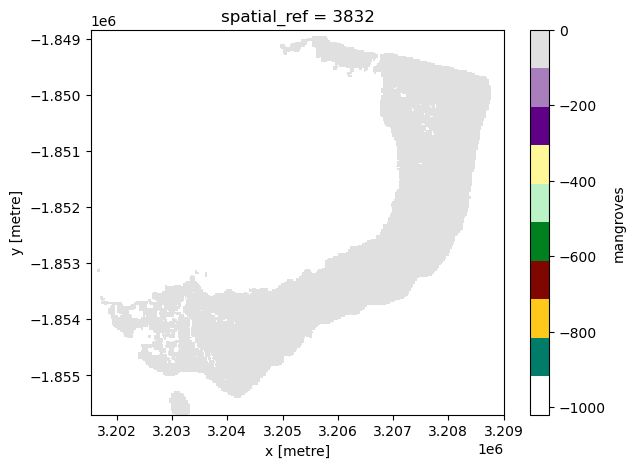

In [48]:
change_2018_2024.plot(cmap=cd_map, size=5)

In [49]:
change_2018_2024.odc.write_cog("change_detection/change_2018_2024.tif", overwrite=True)


PosixPath('change_detection/change_2018_2024.tif')